In [5]:
!pip install PyMuPDF

   ---------------------------------------- 0.0/16.6 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.6 MB 6.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/16.6 MB 6.3 MB/s eta 0:00:03
   --------- ------------------------------ 3.9/16.6 MB 6.2 MB/s eta 0:00:03
   ------------ --------------------------- 5.2/16.6 MB 6.1 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.6 MB 6.0 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.6 MB 6.1 MB/s eta 0:00:02
   --------------------- ------------------ 8.9/16.6 MB 6.1 MB/s eta 0:00:02
   ------------------------ --------------- 10.2/16.6 MB 6.1 MB/s eta 0:00:02
   --------------------------- ------------ 11.5/16.6 MB 6.1 MB/s eta 0:00:01
   ------------------------------ --------- 12.8/16.6 MB 6.1 MB/s eta 0:00:01
   ---------------------------------- ----- 14.2/16.6 MB 6.0 MB/s eta 0:00:01
   ------------------------------------- -- 15.5/16.6 MB 6.0 MB/s eta 0:00:01
 

DEPRECATION: Loading egg at c:\users\arpan\anaconda3\envs\text_analytics\lib\site-packages\huggingface_hub-0.29.1-py3.8.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [6]:
import fitz  # PyMuPDF

# Load PDF and extract text
pdf_path = r"C:\Users\arpan\Downloads\AI coursework\merged.pdf"  # Change this to your actual file path

def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text("text") + "\n"  # Extract text from each page
    return text

pdf_text = extract_text_from_pdf(pdf_path)
print(pdf_text[:100])  # Print first 1000 characters to check extraction


The Project Gutenberg eBook of Child Whispers
This ebook is for the use of anyone anywhere in the Un


In [7]:
import nltk
import re
from collections import defaultdict
nltk.download('punkt')

# Tokenize into sentences
sentences = nltk.sent_tokenize(pdf_text)

# Tokenize into words
words = re.findall(r'\b\w+\b', pdf_text.lower())  # Extract words ignoring punctuation


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# Example word list (change this based on your needs)
word_list = ["children","humorous","poems","whimsical","ideas","successful","suggestion","school","enjoy","hearing","learning","collection","forward",
"little","people","world","garden","looks",
"early","walking","surprise","fairies","summer",
"clouds","sky","atoms","energy","fuel","substances","elements",
"molecule","water","discovery","shadow","mystery",
"development","materials","space","empty","radioactive",

"extremely","signal","time","supply","controlled",

"run","locomotive","tank","engines","equipment",

"aviation","story","history","famous",

"work","aircraft","structure","machines","progress",

"human","stories","flying","large","experiments","failures",

"elastic","progress","dismal","aerodrome",

"young","capable","succeeded","air","control","wing",

"ignored","first","mastered","thrust","thrilled",

"plane","technique","gunfire","pilots","weapon",

"production","thinking","fought","believed","boats",

"satisfied","heavy","factory","endurance","dream",

"gyro","clippers","naval","enemies","captain"]

# Initialize co-occurrence dictionary
co_occurrence = defaultdict(lambda: defaultdict(int))

# Count co-occurrences in sentences
for sentence in sentences:
    sentence_words = set(nltk.word_tokenize(sentence))  # Unique words in the sentence
    for word1 in word_list:
        for word2 in word_list:
            if word1 in sentence_words and word2 in sentence_words and word1 != word2:
                co_occurrence[word1][word2] += 1

# Print co-occurrence matrix
for word1 in word_list:
    print(f"{word1}: {dict(co_occurrence[word1])}")


children: {'world': 1, 'humorous': 1, 'poems': 2, 'whimsical': 1, 'ideas': 1, 'successful': 1, 'suggestion': 1, 'school': 2, 'enjoy': 1, 'hearing': 1, 'learning': 1, 'energy': 1, 'flying': 1, 'air': 1}
humorous: {'children': 1, 'poems': 1, 'whimsical': 1, 'ideas': 1}
poems: {'children': 2, 'humorous': 1, 'whimsical': 1, 'ideas': 1, 'successful': 1, 'suggestion': 1, 'school': 1, 'enjoy': 1, 'hearing': 1, 'learning': 1}
whimsical: {'children': 1, 'humorous': 1, 'poems': 1, 'ideas': 1}
ideas: {'children': 1, 'humorous': 1, 'poems': 1, 'whimsical': 1, 'time': 1, 'work': 2, 'aviation': 2, 'naval': 2, 'enemies': 1}
successful: {'children': 1, 'poems': 1, 'suggestion': 1, 'school': 1, 'enjoy': 1, 'hearing': 1, 'learning': 1, 'first': 9, 'time': 3, 'air': 2, 'little': 1, 'aviation': 2, 'naval': 1, 'early': 1, 'flying': 2, 'boats': 1, 'world': 1, 'aircraft': 2, 'experiments': 1, 'famous': 1, 'pilots': 1, 'plane': 1}
suggestion: {'children': 1, 'poems': 1, 'successful': 1, 'school': 1, 'enjoy': 

In [9]:
from itertools import combinations
import numpy as np

# Find positions of each word
word_positions = {word: [i for i, w in enumerate(words) if w == word] for word in word_list}

# Compute average distance between word pairs
distance_matrix = {}

for word1, word2 in combinations(word_list, 2):
    distances = [abs(pos1 - pos2) for pos1 in word_positions[word1] for pos2 in word_positions[word2]]
    avg_distance = np.mean(distances) if distances else float('inf')  # Use 'inf' if words never co-occur
    distance_matrix[(word1, word2)] = avg_distance

# Print results
for pair, dist in distance_matrix.items():
    print(f"Distance between {pair[0]} and {pair[1]}: {dist}")


Distance between children and humorous: 3097.75
Distance between children and poems: 3086.75
Distance between children and whimsical: 3090.4166666666665
Distance between children and ideas: 28137.93181818182
Distance between children and successful: 29342.126811594204
Distance between children and suggestion: 3083.5833333333335
Distance between children and school: 25257.166666666668
Distance between children and enjoy: 3085.0833333333335
Distance between children and hearing: 18148.75
Distance between children and learning: 3085.5833333333335
Distance between children and collection: 23398.134615384617
Distance between children and forward: 31090.5
Distance between children and little: 12855.782679738562
Distance between children and people: 22017.957207207208
Distance between children and world: 30441.66958041958
Distance between children and garden: 3569.35
Distance between children and looks: 7411.416666666667
Distance between children and early: 29232.326923076922
Distance between

In [10]:
import pandas as pd

# Create a sorted list of words
sorted_words = sorted(word_list)

# Initialize an empty matrix
similarity_matrix = pd.DataFrame(0, index=sorted_words, columns=sorted_words)

# Fill in the matrix with co-occurrence values
for word1 in sorted_words:
    for word2 in sorted_words:
        if word1 != word2:
            similarity_matrix.loc[word1, word2] = co_occurrence[word1][word2]

# Convert dictionary-based distance matrix into a DataFrame
distance_df = pd.DataFrame(float('inf'), index=sorted_words, columns=sorted_words)

for (word1, word2), distance in distance_matrix.items():
    distance_df.loc[word1, word2] = distance
    distance_df.loc[word2, word1] = distance  # Symmetric

# Convert distance to similarity (higher co-occurrence → more similarity)
max_co_occurrence = similarity_matrix.to_numpy().max()
max_distance = distance_df.replace(float('inf'), 0).to_numpy().max()

if max_co_occurrence > 0:
    similarity_matrix = similarity_matrix / max_co_occurrence  # Normalize between 0-1

if max_distance > 0:
    distance_df = 1 - (distance_df / max_distance)  # Invert distance to similarity

# Save both matrices to CSV
similarity_matrix.to_csv("word_cooccurrence_similarity.csv")
distance_df.to_csv("word_distance_similarity.csv")

print("Similarity matrices saved successfully!")


Similarity matrices saved successfully!


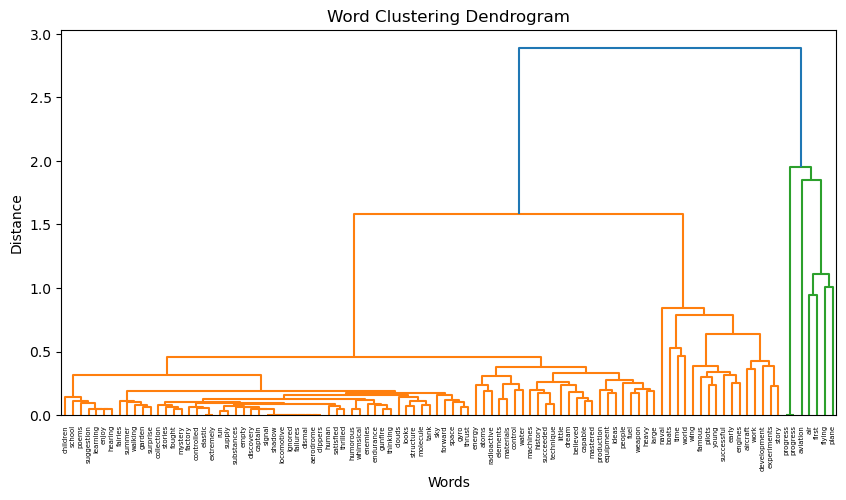

In [13]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Convert similarity to distance (for hierarchical clustering)
distance_matrix = 1 - similarity_matrix  # Invert similarity to distance

# Convert to condensed form for clustering
#condensed_distances = squareform(distance_matrix)

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=sorted_words, leaf_rotation=90)
plt.title("Word Clustering Dendrogram")
plt.xlabel("Words")
plt.ylabel("Distance")
plt.show()


In [12]:
from sklearn.cluster import KMeans

# Define the number of clusters (choose based on data)
num_clusters = 5  

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(similarity_matrix)

# Assign words to clusters
word_clusters = pd.DataFrame({"Word": sorted_words, "Cluster": labels})
word_clusters.to_csv("word_clusters.csv", index=False)

print("Word clusters saved successfully!")


Word clusters saved successfully!
